In [1]:
import pandas as pd
df=pd.read_csv("Encoding Data.csv")
df

,id,bin_1,bin_2,nom_0,ord_2
0,0,F,N,Red,Hot
1,1,F,Y,Blue,Warm
2,2,F,N,Blue,Cold
3,3,F,N,Green,Warm
4,4,T,N,Red,Cold
5,5,T,N,Green,Hot
6,6,F,N,Red,Cold
7,7,T,N,Red,Cold
8,8,F,N,Blue,Warm
9,9,F,Y,Red,Hot


In [2]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
pm=['Hot','Warm','Cold']
e1=OrdinalEncoder(categories=[pm])
e1.fit_transform(df[["ord_2"]])

array([[0.],
       [1.],
       [2.],
       [1.],
       [2.],
       [0.],
       [2.],
       [2.],
       [1.],
       [0.]])

In [3]:
df['bo2']=e1.fit_transform(df[["ord_2"]])
df

,id,bin_1,bin_2,nom_0,ord_2,bo2
0,0,F,N,Red,Hot,0.0
1,1,F,Y,Blue,Warm,1.0
2,2,F,N,Blue,Cold,2.0
3,3,F,N,Green,Warm,1.0
4,4,T,N,Red,Cold,2.0
5,5,T,N,Green,Hot,0.0
6,6,F,N,Red,Cold,2.0
7,7,T,N,Red,Cold,2.0
8,8,F,N,Blue,Warm,1.0
9,9,F,Y,Red,Hot,0.0


In [4]:
le=LabelEncoder()
dfc=df.copy()
dfc['ord_2']=le.fit_transform(dfc['ord_2'])
dfc

,id,bin_1,bin_2,nom_0,ord_2,bo2
0,0,F,N,Red,1,0.0
1,1,F,Y,Blue,2,1.0
2,2,F,N,Blue,0,2.0
3,3,F,N,Green,2,1.0
4,4,T,N,Red,0,2.0
5,5,T,N,Green,1,0.0
6,6,F,N,Red,0,2.0
7,7,T,N,Red,0,2.0
8,8,F,N,Blue,2,1.0
9,9,F,Y,Red,1,0.0


In [5]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False)
df2=df.copy()
enc=pd.DataFrame(ohe.fit_transform(df2[["nom_0"]]))

In [6]:
df2=pd.concat([df2,enc],axis=1)
df2

,id,bin_1,bin_2,nom_0,ord_2,bo2,0,1,2
0,0,F,N,Red,Hot,0.0,0.0,0.0,1.0
1,1,F,Y,Blue,Warm,1.0,1.0,0.0,0.0
2,2,F,N,Blue,Cold,2.0,1.0,0.0,0.0
3,3,F,N,Green,Warm,1.0,0.0,1.0,0.0
4,4,T,N,Red,Cold,2.0,0.0,0.0,1.0
5,5,T,N,Green,Hot,0.0,0.0,1.0,0.0
6,6,F,N,Red,Cold,2.0,0.0,0.0,1.0
7,7,T,N,Red,Cold,2.0,0.0,0.0,1.0
8,8,F,N,Blue,Warm,1.0,1.0,0.0,0.0
9,9,F,Y,Red,Hot,0.0,0.0,0.0,1.0


In [7]:
pd.get_dummies(df2,columns=["nom_0"])

,id,bin_1,bin_2,ord_2,bo2,0,1,2,nom_0_Blue,nom_0_Green,nom_0_Red
0,0,F,N,Hot,0.0,0.0,0.0,1.0,False,False,True
1,1,F,Y,Warm,1.0,1.0,0.0,0.0,True,False,False
2,2,F,N,Cold,2.0,1.0,0.0,0.0,True,False,False
3,3,F,N,Warm,1.0,0.0,1.0,0.0,False,True,False
4,4,T,N,Cold,2.0,0.0,0.0,1.0,False,False,True
5,5,T,N,Hot,0.0,0.0,1.0,0.0,False,True,False
6,6,F,N,Cold,2.0,0.0,0.0,1.0,False,False,True
7,7,T,N,Cold,2.0,0.0,0.0,1.0,False,False,True
8,8,F,N,Warm,1.0,1.0,0.0,0.0,True,False,False
9,9,F,Y,Hot,0.0,0.0,0.0,1.0,False,False,True


In [8]:
from category_encoders import BinaryEncoder
df=pd.read_csv("data.csv")
df

,id,bin_1,bin_2,City,Ord_1,Ord_2,Target
0,0,F,N,Delhi,Hot,High School,0
1,1,F,Y,Bangalore,Warm,Masters,1
2,2,M,N,Mumbai,Very Hot,Diploma,1
3,3,M,Y,Chennai,Cold,Bachelors,0
4,4,M,Y,Delhi,Cold,Bachelors,1
5,5,F,N,Delhi,Very Hot,Masters,0
6,6,M,N,Chennai,Warm,PhD,1
7,7,F,N,Chennai,Hot,High School,1
8,8,M,N,Delhi,Very Hot,High School,0
9,9,F,Y,Delhi,Warm,PhD,0


In [9]:
be=BinaryEncoder()
nd=be.fit_transform(df['Ord_2'])
df

,id,bin_1,bin_2,City,Ord_1,Ord_2,Target
0,0,F,N,Delhi,Hot,High School,0
1,1,F,Y,Bangalore,Warm,Masters,1
2,2,M,N,Mumbai,Very Hot,Diploma,1
3,3,M,Y,Chennai,Cold,Bachelors,0
4,4,M,Y,Delhi,Cold,Bachelors,1
5,5,F,N,Delhi,Very Hot,Masters,0
6,6,M,N,Chennai,Warm,PhD,1
7,7,F,N,Chennai,Hot,High School,1
8,8,M,N,Delhi,Very Hot,High School,0
9,9,F,Y,Delhi,Warm,PhD,0


In [10]:
dfb=pd.concat([df,nd],axis=1)
dfb

,id,bin_1,bin_2,City,Ord_1,Ord_2,Target,Ord_2_0,Ord_2_1,Ord_2_2
0,0,F,N,Delhi,Hot,High School,0,0,0,1
1,1,F,Y,Bangalore,Warm,Masters,1,0,1,0
2,2,M,N,Mumbai,Very Hot,Diploma,1,0,1,1
3,3,M,Y,Chennai,Cold,Bachelors,0,1,0,0
4,4,M,Y,Delhi,Cold,Bachelors,1,1,0,0
5,5,F,N,Delhi,Very Hot,Masters,0,0,1,0
6,6,M,N,Chennai,Warm,PhD,1,1,0,1
7,7,F,N,Chennai,Hot,High School,1,0,0,1
8,8,M,N,Delhi,Very Hot,High School,0,0,0,1
9,9,F,Y,Delhi,Warm,PhD,0,1,0,1


In [11]:
from category_encoders import TargetEncoder
te=TargetEncoder()
CC=df.copy()
new=te.fit_transform(X=CC["City"],y=CC["Target"])
CC=pd.concat([CC,new],axis=1)
CC

,id,bin_1,bin_2,City,Ord_1,Ord_2,Target,City
0,0,F,N,Delhi,Hot,High School,0,0.445272
1,1,F,Y,Bangalore,Warm,Masters,1,0.565054
2,2,M,N,Mumbai,Very Hot,Diploma,1,0.565054
3,3,M,Y,Chennai,Cold,Bachelors,0,0.525744
4,4,M,Y,Delhi,Cold,Bachelors,1,0.445272
5,5,F,N,Delhi,Very Hot,Masters,0,0.445272
6,6,M,N,Chennai,Warm,PhD,1,0.525744
7,7,F,N,Chennai,Hot,High School,1,0.525744
8,8,M,N,Delhi,Very Hot,High School,0,0.445272
9,9,F,Y,Delhi,Warm,PhD,0,0.445272


In [12]:
from scipy import stats
import numpy as np
df=pd.read_csv("Data_to_Transform.csv")
df

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew
0,0.899990,2.895074,11.180748,9.027485
1,1.113554,2.962385,10.842938,9.009762
2,1.156830,2.966378,10.817934,9.006134
3,1.264131,3.000324,10.764570,9.000125
4,1.323914,3.012109,10.753117,8.981296
...,...,...,...,...
9995,14.749050,16.289513,-2.980821,-3.254882
9996,14.854474,16.396252,-3.147526,-3.772332
9997,15.262103,17.102991,-3.517256,-4.717950
9998,15.269983,17.628467,-4.689833,-5.670496


In [13]:
df.skew()

Moderate Positive Skew    0.656308
Highly Positive Skew      1.271249
Moderate Negative Skew   -0.690244
Highly Negative Skew     -1.201891
dtype: float64

In [14]:
np.log(df["Highly Positive Skew"])

0       1.063011
1       1.085995
2       1.087342
3       1.098720
4       1.102640
          ...   
9995    2.790522
9996    2.797053
9997    2.839253
9998    2.869515
9999    2.893275
Name: Highly Positive Skew, Length: 10000, dtype: float64

In [15]:
np.reciprocal(df["Moderate Positive Skew"])

0       1.111123
1       0.898026
2       0.864431
3       0.791057
4       0.755336
          ...   
9995    0.067801
9996    0.067320
9997    0.065522
9998    0.065488
9999    0.061711
Name: Moderate Positive Skew, Length: 10000, dtype: float64

In [16]:
np.sqrt(df["Highly Positive Skew"])

0       1.701492
1       1.721158
2       1.722317
3       1.732144
4       1.735543
          ...   
9995    4.036027
9996    4.049229
9997    4.135576
9998    4.198627
9999    4.248803
Name: Highly Positive Skew, Length: 10000, dtype: float64

In [17]:
np.square(df["Highly Positive Skew"])

0         8.381452
1         8.775724
2         8.799396
3         9.001942
4         9.072800
           ...    
9995    265.348230
9996    268.837091
9997    292.512290
9998    310.762852
9999    325.886637
Name: Highly Positive Skew, Length: 10000, dtype: float64

In [18]:
df["Highly Positive Skew_boxcox"], parameters=stats.boxcox(df["Highly Positive Skew"])
df

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew,Highly Positive Skew_boxcox
0,0.899990,2.895074,11.180748,9.027485,0.812909
1,1.113554,2.962385,10.842938,9.009762,0.825921
2,1.156830,2.966378,10.817934,9.006134,0.826679
3,1.264131,3.000324,10.764570,9.000125,0.833058
4,1.323914,3.012109,10.753117,8.981296,0.835247
...,...,...,...,...,...
9995,14.749050,16.289513,-2.980821,-3.254882,1.457701
9996,14.854474,16.396252,-3.147526,-3.772332,1.459189
9997,15.262103,17.102991,-3.517256,-4.717950,1.468681
9998,15.269983,17.628467,-4.689833,-5.670496,1.475357


In [19]:
df.skew()

Moderate Positive Skew         0.656308
Highly Positive Skew           1.271249
Moderate Negative Skew        -0.690244
Highly Negative Skew          -1.201891
Highly Positive Skew_boxcox    0.023089
dtype: float64

In [20]:
df["Highly Negative Skew_yeojohnson"],parameters=stats.yeojohnson(df["Highly Negative Skew"])
df.skew()

Moderate Positive Skew             0.656308
Highly Positive Skew               1.271249
Moderate Negative Skew            -0.690244
Highly Negative Skew              -1.201891
Highly Positive Skew_boxcox        0.023089
Highly Negative Skew_yeojohnson   -0.274676
dtype: float64

In [21]:
from sklearn.preprocessing import QuantileTransformer
qt=QuantileTransformer(output_distribution='normal')
df["Moderate Negative Skew_1"]=qt.fit_transform(df[["Moderate Negative Skew"]])
df

,Moderate Positive Skew,Highly Positive Skew,Moderate Negative Skew,Highly Negative Skew,Highly Positive Skew_boxcox,Highly Negative Skew_yeojohnson,Moderate Negative Skew_1
0,0.899990,2.895074,11.180748,9.027485,0.812909,51.081488,5.199338
1,1.113554,2.962385,10.842938,9.009762,0.825921,50.898043,3.227288
2,1.156830,2.966378,10.817934,9.006134,0.826679,50.860532,3.206801
3,1.264131,3.000324,10.764570,9.000125,0.833058,50.798434,3.167111
4,1.323914,3.012109,10.753117,8.981296,0.835247,50.604086,3.159208
...,...,...,...,...,...,...,...
9995,14.749050,16.289513,-2.980821,-3.254882,1.457701,-1.433326,-3.147619
9996,14.854474,16.396252,-3.147526,-3.772332,1.459189,-1.545673,-3.162489
9997,15.262103,17.102991,-3.517256,-4.717950,1.468681,-1.722267,-3.198205
9998,15.269983,17.628467,-4.689833,-5.670496,1.475357,-1.872430,-3.350199


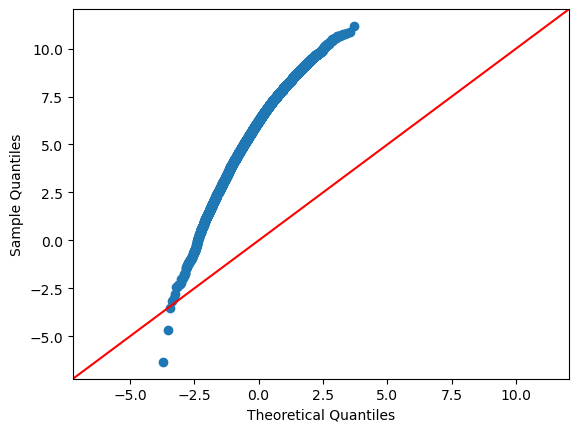

In [22]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.qqplot(df["Moderate Negative Skew"],line='45')
plt.show()

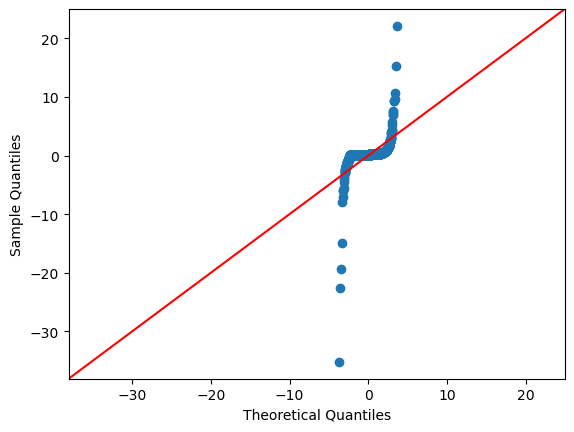

In [23]:
sm.qqplot(np.reciprocal(df["Moderate Negative Skew"]),line='45')
plt.show()

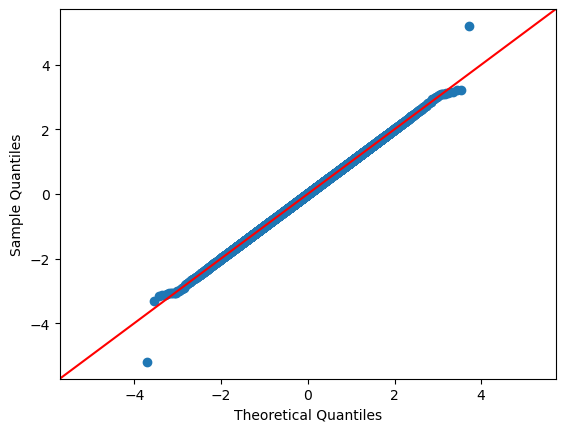

In [24]:
from sklearn.preprocessing import QuantileTransformer
qt=QuantileTransformer(output_distribution='normal',n_quantiles=891)

df["Moderate Negative Skew"]=qt.fit_transform(df[["Moderate Negative Skew"]])

sm.qqplot(df["Moderate Negative Skew"],line='45')
plt.show()

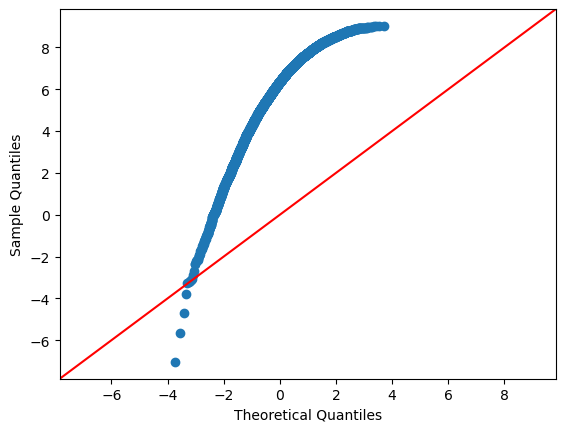

In [25]:
df["Highly Negative Skew_1"]=qt.fit_transform(df[["Highly Negative Skew"]])
sm.qqplot(df["Highly Negative Skew"],line='45')
plt.show()

In [26]:
dt=pd.read_csv("titanic_dataset.csv")
dt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


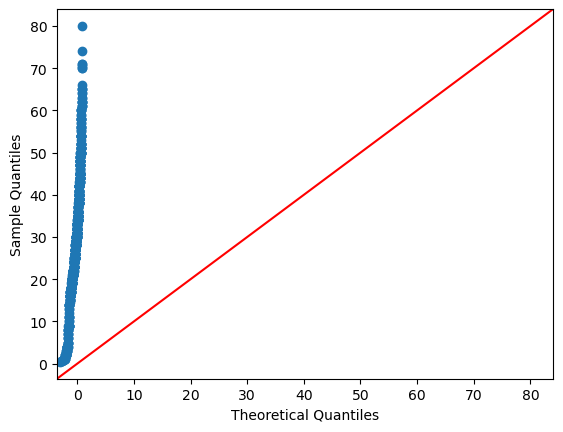

In [27]:
from sklearn.preprocessing import QuantileTransformer
qt=QuantileTransformer(output_distribution='normal',n_quantiles=891)
dt["Age_1"]=qt.fit_transform(dt[["Age"]])
sm.qqplot(dt['Age'],line='45') 
plt.show()

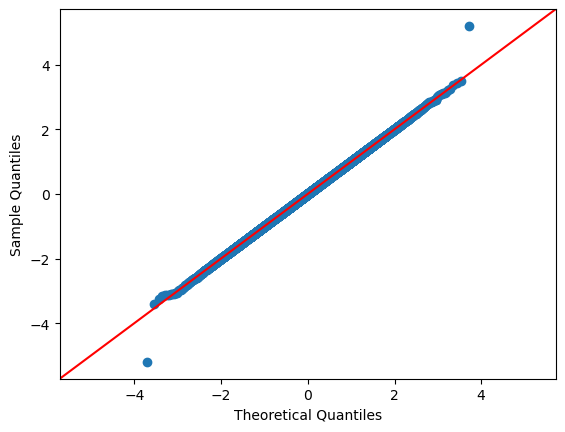

In [28]:
sm.qqplot(df["Highly Negative Skew_1"],line='45')
plt.show()